In [21]:
from scipy import fft
from scipy import signal
import scipy.io.wavfile
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import Audio

### Zadanie 2.

Wgraj plik `piano.wav`, a następnie stwórz jego spektrogram. Dobierz parametry wyświetlania spektrogramu tak, by był czytelny. Oceń, czy da się odczytać z niego informację o częstotliwościach dźwięków występujących w nagraniu.

*(źródło danych: https://freesound.org/people/Meral/sounds/104587/)*

In [22]:
sample_rate, piano = io.wavfile.read("/home/pawel/Downloads/piano.wav")
piano = piano.mean(axis = 1)

In [49]:
N = int(sample_rate*0.5)

In [50]:
f_piano = fft.fftfreq(N, d=1/sample_rate)
time_piano = np.linspace(0, 0.5, N)
mask_piano = (f_piano>=0)*(f_piano<=1000)

In [58]:
n_max = int(len(piano) / N)
f_values = np.sum(mask_piano)
piano_spectrogram = np.zeros((n_max, f_values))
piano_subdata = piano[:N]
window = signal.blackman(len(piano_subdata))

In [59]:
for i in range(0, n_max):
    piano_subdata = piano[(N * i):(N * (i + 1))]
    piano_fft = fft.fft(piano_subdata * window)
    piano_spectrogram[i, :] = np.log(abs(piano_fft[mask_piano]))

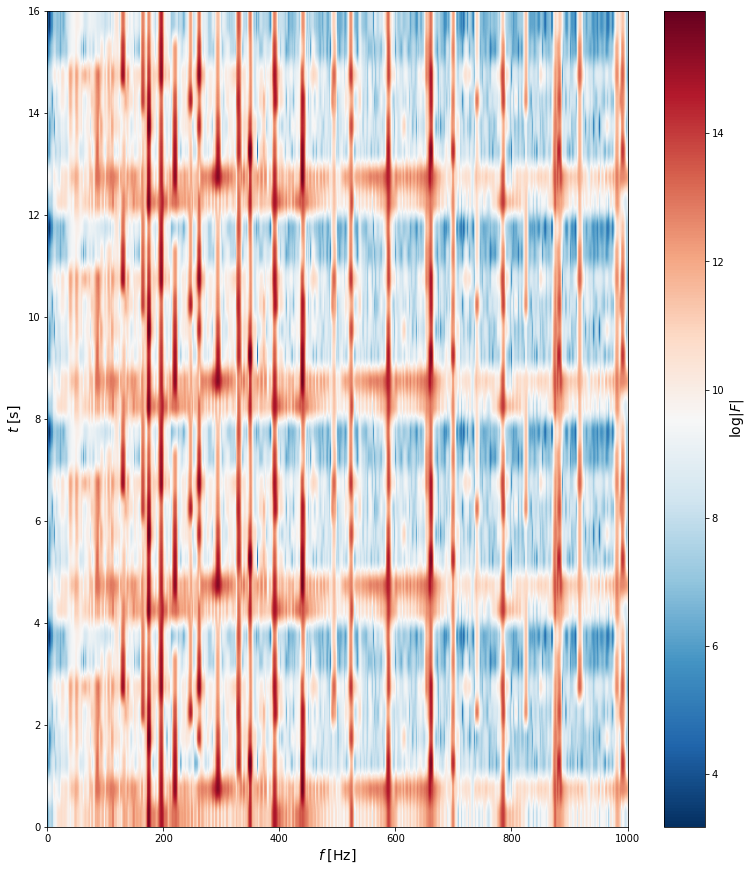

In [67]:
fig, axes = plt.subplots(figsize=(13,15))
p = axes.imshow(piano_spectrogram, origin='lower', 
                extent=(0, 1000, 0, piano.shape[0] / sample_rate),
                aspect='auto',
                cmap=mpl.cm.RdBu_r)
cb = fig.colorbar(p, ax=axes)
cb.set_label("$\log|F|$", fontsize=14)
axes.set_ylabel("$t\;[\mathrm{s}]$", fontsize=14)
axes.set_xlabel("$f\;[\mathrm{Hz}]$", fontsize=14)
plt.show()

Słuchając muzyki zdecydowanie słychać powtarzającą się w kilkusekundowym okresie sekwencję dźwięków. Są one szczególnie widoczne w pierwszej, piątej, dziewiątej i trzynastej sekundzie na spektogramie. Wówczas nasilone jest około 12 poziomów częstotliwości. Kolejne dźwięki nie są już aż tak widoczne. Ponieważ melodia jest niemal w pełni sekwencyjne, spektogram również wyszedł w miarę okresowy o T = 4s.